In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
path = r"Datasets"

coe = np.genfromtxt(path + "\coe-results.csv", delimiter=",", skip_header = 1,
                    dtype = [("month", "U7"), 
                              ("bidding_no", "int64"), 
                              ("vehicle_class", "U100"),
                              ("quota", "int64"),
                              ("bids_success", "int64"),
                              ("bids_received", "int64"),
                              ("premium", "int64")])

license = np.genfromtxt(path + "\\total-number-of-persons-holding-qualified-driving-licence.csv", delimiter = ",", skip_header = 1,
                       dtype = [("year", "U4"),
                                ("qualified_driving_licence_holders", "int64")])

# travel = np.genfromtxt(path + "\\average-annual-kilometres-travelled-per-vehicle.csv",delimiter=",",  skip_header = 1,
#                        dtype = [("year", "U4"), 
#                               ("vehicle_type", "U100"),
#                               ("average_annual_mileage", "int64")])


hdb = np.genfromtxt(path + "\hdb-carpark-information.txt", delimiter = "\t", skip_header = 1,
                   dtype = [("car_park_no", "U5"),
                            ("address", "U100"),
                            ("x_coord", "float"),
                            ("y_coord", "float"),
                            ("car_park_type", "U100"),
                            ("type_of_parking_system", "U100"),
                            ("short_term_parking", "U100"),
                            ("free_parking", "U100"),
                            ("night_parking", "U100"),
                            ("car_park_decks", "int64"),
                            ("gantry_height", "float"),
                            ("car_park_basement", "U1")])

In [3]:
#Function to generate the data for 2 years by Category 
def Category(year):
    bid_A = []
    bid_B = []
    bid_C = []
    bid_D = []
    bid_E = []
    bid_rec_E = []
    for i in range(len(coe['month'])):
        if coe['month'][i].startswith(year) and coe['bidding_no'][i] == 1:
            if coe['vehicle_class'][i] == "Category A":
                bid_A.append(int(coe['premium'][i]))
            elif coe['vehicle_class'][i] == "Category B":
                bid_B.append(int(coe['premium'][i]))
            elif coe['vehicle_class'][i] == "Category C":
                bid_C.append(int(coe['premium'][i]))
            elif coe['vehicle_class'][i] == "Category D":
                bid_D.append(int(coe['premium'][i]))
            elif coe['vehicle_class'][i] == "Category E":
                bid_E.append(int(coe['premium'][i]))
                bid_rec_E.append(int(coe['bids_received'][i]))
    return [bid_A, bid_B, bid_C, bid_D, bid_E, bid_rec_E]

In [4]:
#Choosing the years to be visualised 
year1 = "2015"
year2 = "2016"
year3 = "2017"
year4 = "2018"

categories_1 = Category(year1)
# print(categories_1)

categories_2 = Category(year2)
# print(categories_2)

categories_3 = Category(year3)
# print(categories_3)

categories_4 = Category(year4)
# print(categories_4)

In [5]:
# Calculation of the difference for the respective years

#Year 1
cata_diff_1 = []

for i in range(len(categories_1[0])):
    if i == len(categories_1[0])-1:
        break
    else:
        cata_diff_1.append(categories_1[0][i] - categories_1[0][i +1])
    
# print(cata_diff_1)


#Year 2
cata_diff_2 = []

for i in range(len(categories_2[0])):
    if i == len(categories_2[0])-1:
        break
    else:
        cata_diff_2.append(categories_2[0][i] - categories_2[0][i +1])
    
# print(cata_diff_2)

#Year 3
cata_diff_3 = []

for i in range(len(categories_3[0])):
    if i == len(categories_3[0])-1:
        break
    else:
        cata_diff_3.append(categories_3[0][i] - categories_3[0][i +1])
    

#Year 4
cata_diff_4 = []

for i in range(len(categories_4[0])):
    if i == len(categories_4[0])-1:
        break
    else:
        cata_diff_4.append(categories_4[0][i] - categories_4[0][i +1])
    


In [6]:
# Formatting of data in months

months = ["Jan-Feb", "Feb-Mar", "Mar-Apr", "Apr-May", "May-Jun", "Jun-Jul", "Jul-Aug", "Aug-Sep", "Sep-Oct", "Oct-Nov", "Nov-Dec"]

# Graph 1: Price Difference For Category A (1,600cc <) Every Month From 2015 to 2018

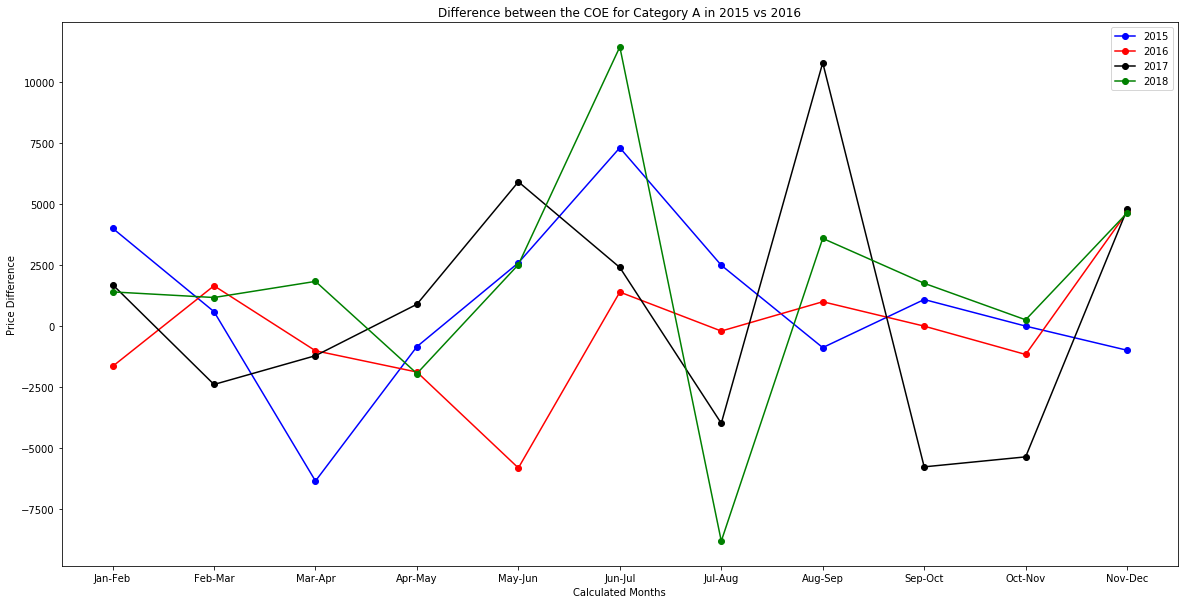

In [7]:
fig,ax = plt.subplots(figsize=(20,10))

ax.plot(months, cata_diff_1, 'bo-', label = year1)
ax.plot(months, cata_diff_2, 'ro-', label = year2)
ax.plot(months, cata_diff_3, 'ko-', label = year3)
ax.plot(months, cata_diff_4, 'go-', label = year4)

ax.set_title("Difference between the COE for Category A in {} vs {}".format(year1, year2))
ax.set_xlabel('Calculated Months')
ax.set_ylabel('Price Difference')

# plt.title = "Difference between the COE for Category A in {} vs {}".format(year1, year2)

plt.legend(loc='upper right')
plt.show()

# Graph 2: The Price Range For Category B (1,600cc >) COE Over The Range Of 4 Years

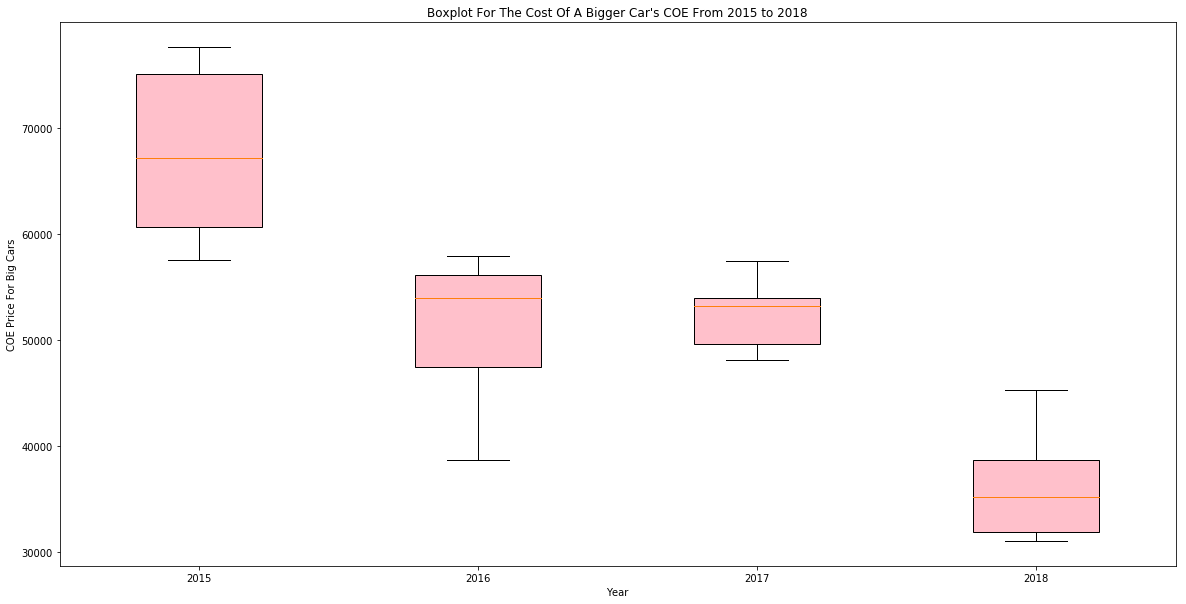

In [8]:
plt.figure(figsize=(20, 10))

data = [categories_1[1], categories_2[1], categories_3[1], categories_4[1]]
label = [year1, year2, year3, year4]

bp = plt.boxplot(data ,labels = label ,patch_artist=True)

for patch in bp["boxes"]:
    patch.set(facecolor="pink")

    
plt.title("Boxplot For The Cost Of A Bigger Car's COE From 2015 to 2018")
plt.xlabel("Year")
plt.ylabel("COE Price For Big Cars")
plt.show()

# Graph 3: The relation between the bids received and the COE price for Category D (Motorbikes)

In [9]:
Cat_D_Premium = categories_1[4] + categories_2[4] + categories_3[4] + categories_4[4]

Cat_D_Bids = categories_1[5] + categories_2[5] + categories_3[5] + categories_4[5]

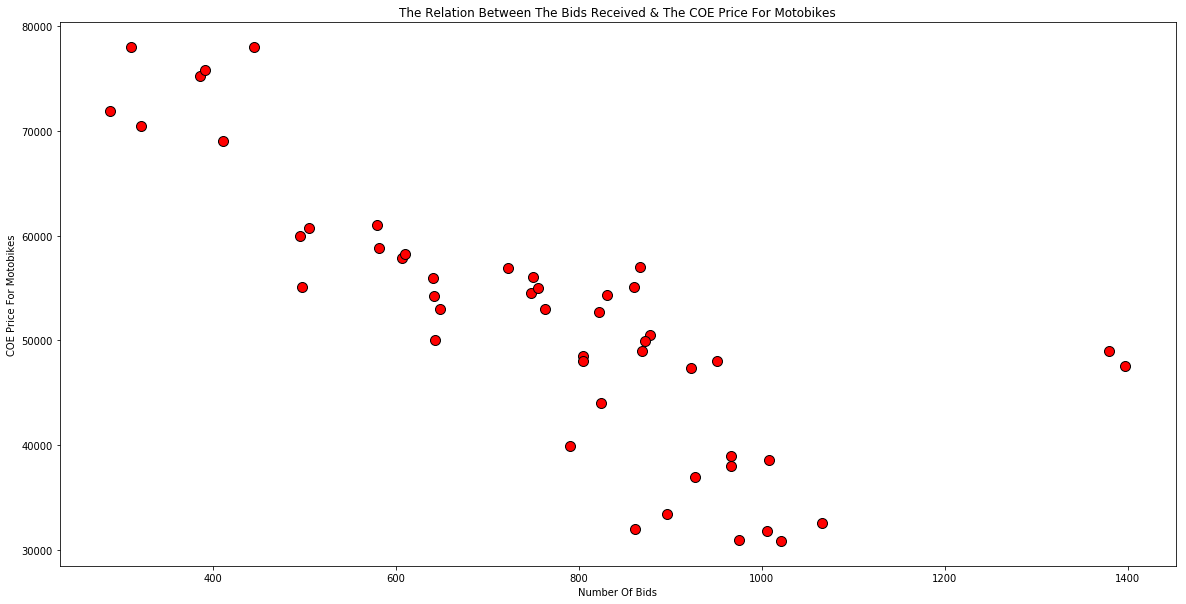

In [10]:
plt.figure(figsize=(20, 10))
x = []
plt.scatter(Cat_D_Bids,Cat_D_Premium, s = 100, color = "red", edgecolor = "black")

plt.title("The Relation Between The Bids Received & The COE Price For Motobikes")
plt.xlabel("Number Of Bids")
plt.ylabel("COE Price For Motobikes")
plt.show()

# Graph 4: The Number Of Driving Licences Over The Years

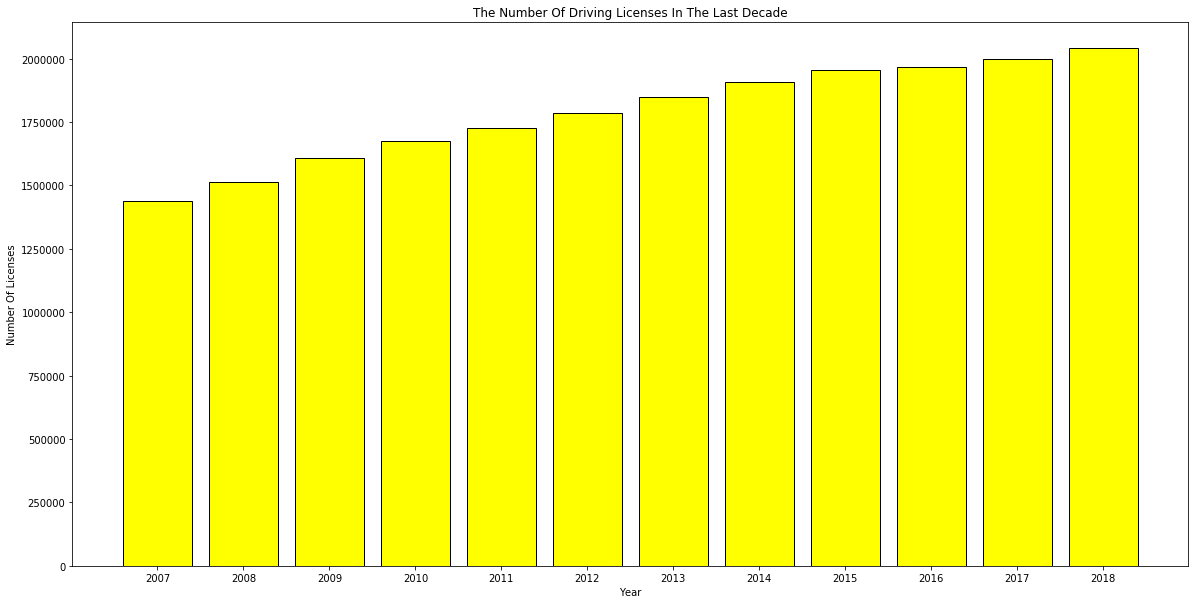

In [11]:
fig,ax = plt.subplots(figsize=(20,10))
ax.bar(license['year'], license['qualified_driving_licence_holders'], color = "yellow", edgecolor = "black")

plt.title("The Number Of Driving Licenses In The Last Decade")
plt.xlabel("Year")
plt.ylabel("Number Of Licenses")
plt.show()

# Graph 5: The Number Of Decks In Singapore's HDB Carparks

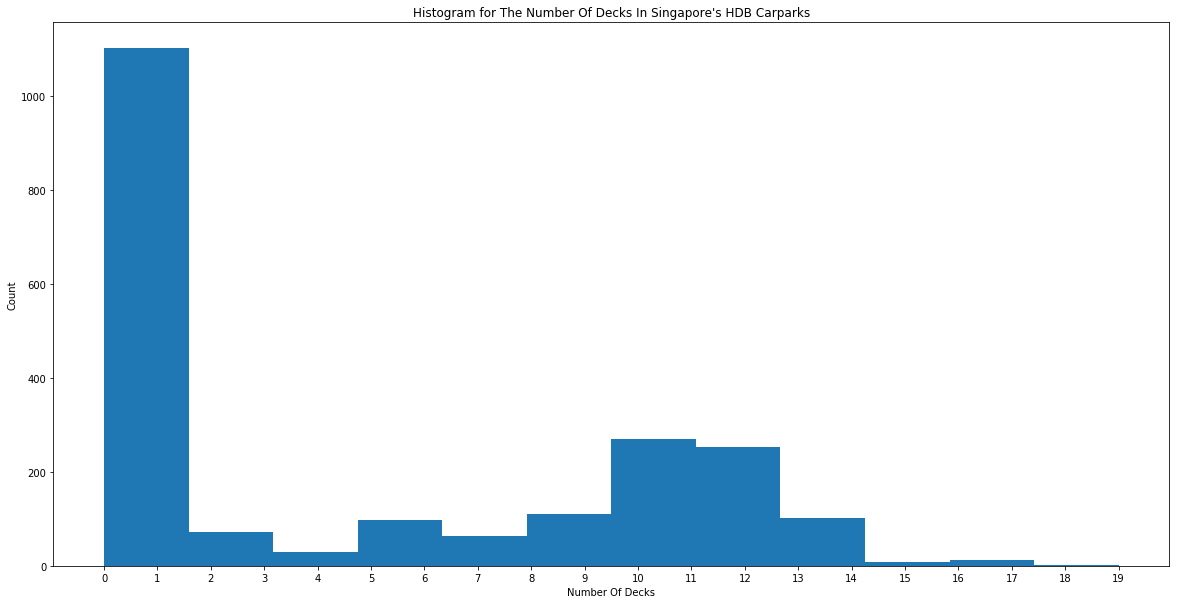

In [42]:
plt.figure(figsize=(20, 10))
plt.xticks(np.arange(20))
plt.hist(hdb['car_park_decks'], bins = 12)
plt.title("Histogram for The Number Of Decks In Singapore's HDB Carparks")
plt.xlabel("Number Of Decks")
plt.ylabel("Count")
plt.show()